In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt


Importamos y limpiamos los datos del repositorio 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities

In [0]:
#Leemos los datos directamente de la página
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data')
#Vamos a tomar solamente 2000 filas. 
x = df.iloc[:,4:]

#Vamos a limpiar los datos que no nos sirven
#Primero reemplazamos los valores '?' por datos vacíos
x=x.replace('?',pd.NaT)
#Ahora eliminamos todas las columnas que tengan datos vacíos
X= x.dropna(axis=1)

#Seleccionamos cuál es nuestra X y nuestra Y
Y=X.iloc[:,-1]
X= X.iloc[:,0:-1]


In [0]:
# Partimos los datos, la mitad para entrenamiento y la otra para test


scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)


#Existen muchas clases en el Y, por tanto debemos normalizarlos.
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

#Estandarizamos los datos reescalando a 1 cada columna
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Utilizamos la regresión logística variando el valor de C

In [0]:
#Utilizamos la regresión logísticas
#Realizamos un for que varie C logaritmicamente, para l1 y l2

variac=15
f1l1 =np.zeros(variac)
f1l2 =np.zeros(variac)
xgraf= np.zeros(variac)
for i in range (variac):
    clf1= LogisticRegression(
    C=10**(-5+i), penalty='l1', solver='saga', tol=0.1
)
    clf2 =LogisticRegression(
    C=10**(-5+i), penalty='l2', solver='saga', tol=0.1
) 
    xgraf[i]=10**(-5+i)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    #Predecimos los números necesitados
    y_pred1=clf1.predict(x_test)
    y_pred2=clf2.predict(x_test)
    f1l1[i]=np.mean(f1_score(y_test, y_pred1, average=None))
    f1l2[i]=np.mean(f1_score(y_test, y_pred2, average=None))


Graficamos

Realmente es bajo el F1 score porque se tienen una clase continua de Ys, precisamente  ese fue el motivo de  la utilización del label encoder.


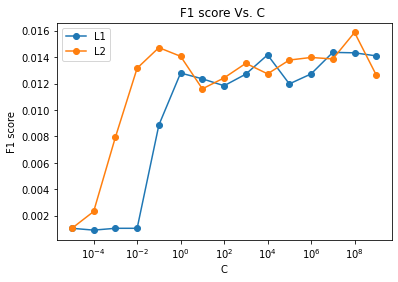

In [5]:
fig, ax = plt.subplots()
ax.semilogx(xgraf, f1l1, 'o-',label='L1')
ax.semilogx(xgraf, f1l2,'o-', label='L2')
ax.set_xlabel('C')
ax.set_ylabel('F1 score')
ax.legend(fontsize=10)
ax.set_title('F1 score Vs. C ')
print('Realmente es bajo el F1 score porque se tienen una clase continua de Ys, precisamente  ese fue el motivo de  la utilización del label encoder.')
plt.show()